In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/covid19-dataset/Covid Data.csv


In [2]:
#Import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import datetime

In [3]:
# Load of data
df = pd.read_csv("/kaggle/input/covid19-dataset/Covid Data.csv")

# Exploratory of And Cleaning of Data

In [4]:
print("SHAPE OF DATAFRAME is: ", df.shape)
df.head()

SHAPE OF DATAFRAME is:  (1048575, 21)


,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


### #Definition of some columns
* USMER: level of medical units(refer to complexity of medical cases.)
* MEDICAL_UNIT : type of institution which provide care.
* PATIENT_TYPE: hospatilized or not 1 for who returned to home
* INTUBED: If connected to ventilator.
* INMSUPR: immunosuppressed or not.
##### #1 is ture 2 is false

In [5]:
df.isnull().sum().sum()

0

### no null but missed valued represent by 97, 98

In [6]:
df.duplicated().sum()

812049

### many values are duplicates, but that due to low of unique values for each columns.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [8]:
#lower name of columns
df.rename(columns=lambda x : x.lower(), inplace=True)

In [9]:
#Parsing of date
df['date_parsed']=pd.to_datetime(df['date_died'][df['date_died']!="9999-99-99"], format="%d/%m/%Y")

In [10]:
df['date_died'].value_counts()

9999-99-99    971633
06/07/2020      1000
07/07/2020       996
13/07/2020       990
16/06/2020       979
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: date_died, Length: 401, dtype: int64

* there are 401 different dates and 9999-99-99 for alive.

In [11]:
#convert date_died to died or not, 2 foe alive 1 for dead
df['death'] = [2 if each == "9999-99-99" else 1 for each in df['date_died'] ]

In [12]:
#drop date_died column
df.drop(columns="date_died", inplace=True)

In [13]:
#Number of unique values of columns
df.nunique()    

usmer                     2
medical_unit             13
sex                       2
patient_type              2
intubed                   4
pneumonia                 3
age                     121
pregnant                  4
diabetes                  3
copd                      3
asthma                    3
inmsupr                   3
hipertension              3
other_disease             3
cardiovascular            3
obesity                   3
renal_chronic             3
tobacco                   3
clasiffication_final      7
icu                       4
date_parsed             400
death                     2
dtype: int64

* there are 121 different ages values I will creat a new column for elderly pateients.

In [14]:
#Create a column for ptients > 65 years and < 65 years
df['elderly'] = [2 if each < 65 else 1 for each in df['age']]

In [15]:
df['elderly'].value_counts()

2    943747
1    104828
Name: elderly, dtype: int64

In [16]:
#calculation of percentage of null values
for i in df.loc[:, ~df.columns.isin(["date_parsed","age", "medical_unit", "clasiffication_final"])]:
    null = df[i][(df[i]!=1)& (df[i]!=2)].value_counts()
    if null.any():
        pe = (null/1048575)*100 #where 1048575 is length of column 
        print("percentage of null values of {} are: \n{}".format(i,pe))   

percentage of null values of intubed are: 
97    80.923539
99     0.698567
Name: intubed, dtype: float64
percentage of null values of pneumonia are: 
99    1.526166
Name: pneumonia, dtype: float64
percentage of null values of pregnant are: 
97    49.925947
98     0.358010
Name: pregnant, dtype: float64
percentage of null values of diabetes are: 
98    0.318337
Name: diabetes, dtype: float64
percentage of null values of copd are: 
98    0.286389
Name: copd, dtype: float64
percentage of null values of asthma are: 
98    0.2841
Name: asthma, dtype: float64
percentage of null values of inmsupr are: 
98    0.324631
Name: inmsupr, dtype: float64
percentage of null values of hipertension are: 
98    0.296021
Name: hipertension, dtype: float64
percentage of null values of other_disease are: 
98    0.481129
Name: other_disease, dtype: float64
percentage of null values of cardiovascular are: 
98    0.29335
Name: cardiovascular, dtype: float64
percentage of null values of obesity are: 
98    0.28

* intubed, pregnant and icu columns have many missed values.

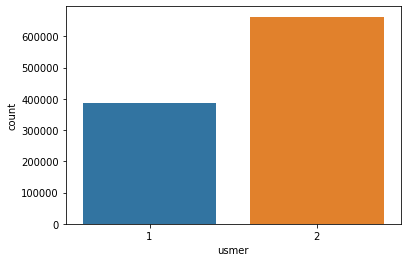

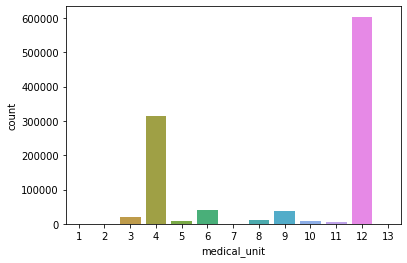

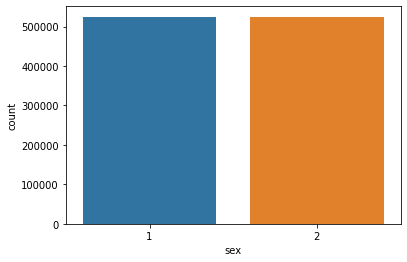

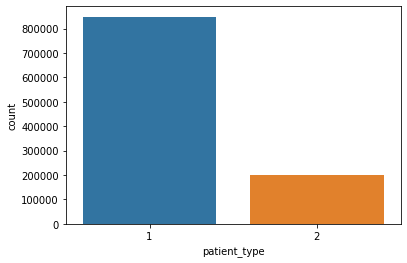

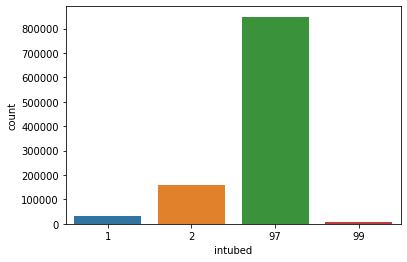

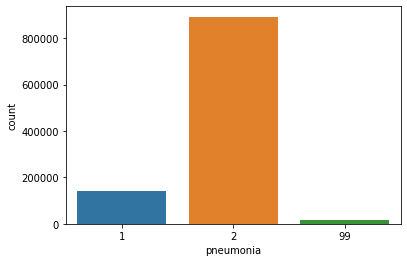

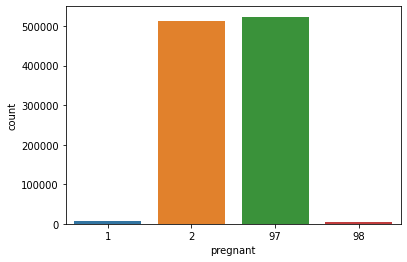

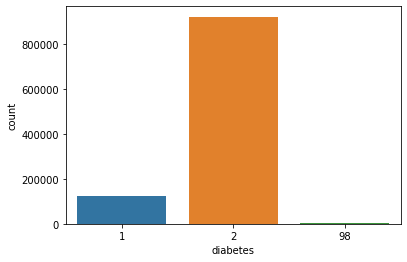

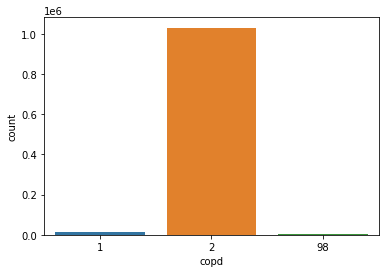

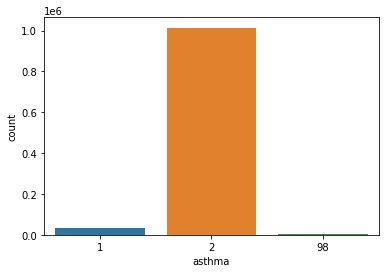

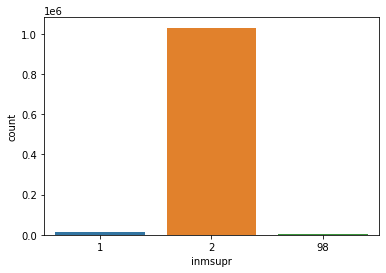

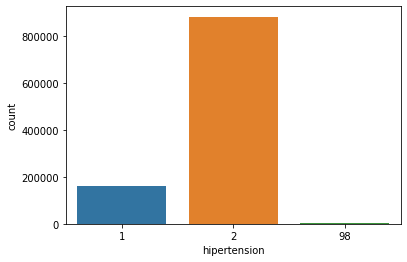

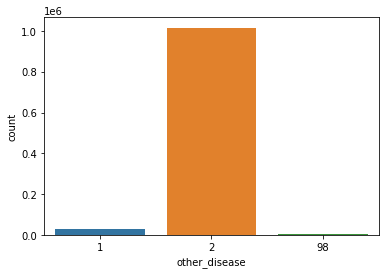

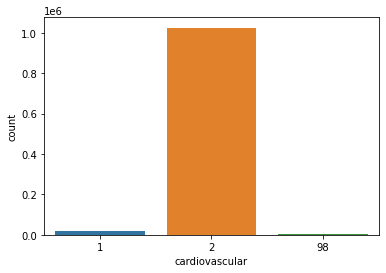

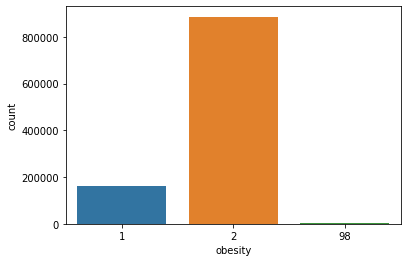

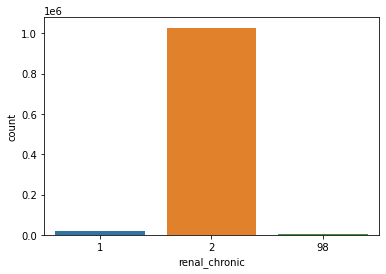

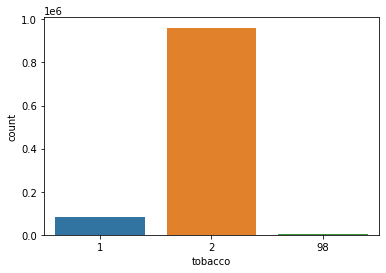

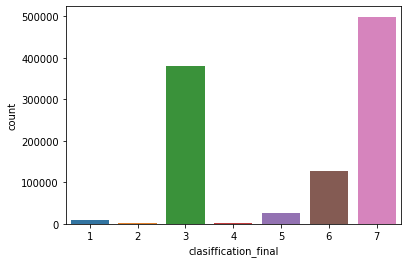

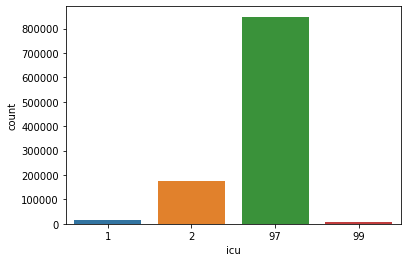

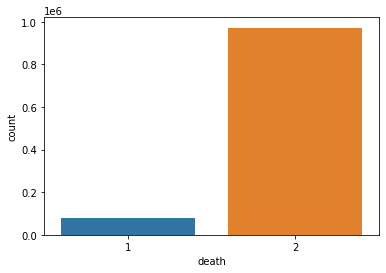

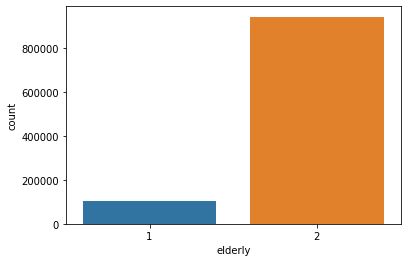

In [17]:
for i in df.loc[:, ~df.columns.isin(["date_parsed", "age"])]:
    f = sns.countplot(x=df[i]);
    plt.show()

* Alive patients > dead

* acc to classiffication: most patient are not tested for COVID-19.(4 or more)

In [18]:
df[(df['pregnant']==97)].sex.value_counts()

2    523511
Name: sex, dtype: int64

* 97 is for men 

In [19]:
#Convert 97 value to 2 in pregnant column men (men do not get pregnant)
df['pregnant'].replace(97, 2, inplace=True)

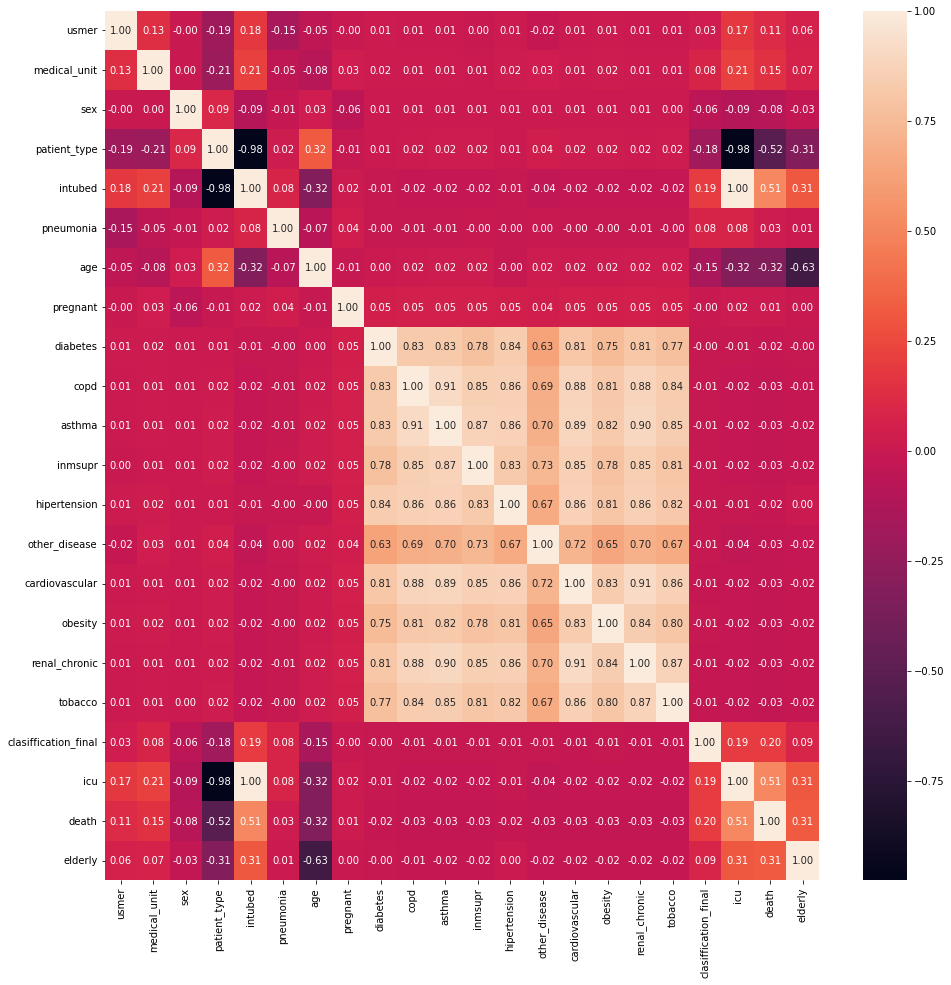

In [20]:
plt.figure(figsize=(16,16))
sns.heatmap(data=df.corr(), annot=True, fmt=".2f");

* some of +ve and -ve correlations are logic; pregnancy and sex, death and patient type, intubed and icu, patient type and death and icu.

In [21]:
#Drope columns which do not have correlation or helpless and contain many nan values
col = ["sex", "intubed", "clasiffication_final", "icu"]
df.drop(columns = col, inplace=True)

In [22]:
df.shape

(1048575, 19)

# Analysis of data

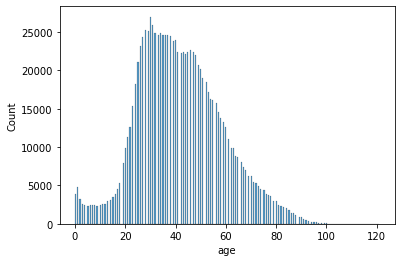

In [23]:
sns.histplot(data=df['age']);

* Age distributed mostly between 20 and 60.

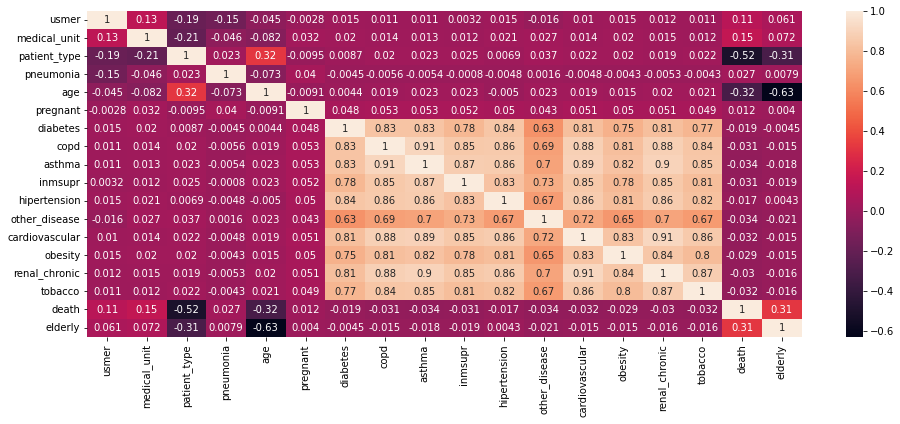

In [24]:
#correlation of data
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), annot=True);

* There is a strong correlation between obesity and chronic diseases.
* Elderly patient tend to hospatilied.
* Eldery patient tend to die.
* Patients tend to have multiple diseases.
* Patients with chronic diseses are immunosuppressed



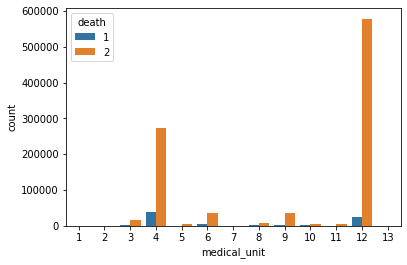

In [25]:
# death acc to medical_unite
sns.countplot(hue=df.death, x= df.medical_unit);

* unit 4 have the hieghtst percentage of death

In [26]:
#Creat column for month
df['month']=df["date_parsed"].dt.month

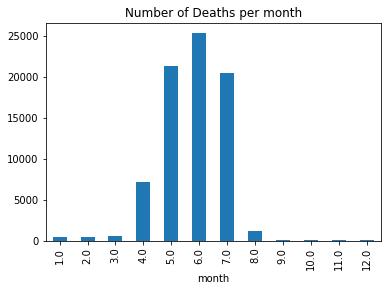

In [27]:
df.groupby("month")["death"].count().plot(kind="bar");
plt.title("Number of Deaths per month");

* Numer of deaths was the high from may to juli, most in june and decreased highly in september.

In [28]:
#Function to calculate percentage of death depend on charachteristic factors of patiens
"""
get total number of patients with some charachreristic and died number of same charach
and get percentage of died patient
"""
def perc_die(col_name,has=1, die=1):
    total=df[df[col_name]==has].age.count()
    num_died=df[(df[col_name]==has) & (df['death']==die)].age.count()
    return num_died/total*100
                

In [29]:
df.columns

Index(['usmer', 'medical_unit', 'patient_type', 'pneumonia', 'age', 'pregnant',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hipertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'date_parsed', 'death', 'elderly', 'month'],
      dtype='object')

In [30]:
#Calculate total percentage of death
t = df[df['death']==1].death.count()/df.shape[0]*100
print("total percentage of sample death = {}%".format("%.2f"%t))

total percentage of sample death = 7.34%


In [31]:
#Calculation of death percentage to detect the effect of each on incidence of death
percen = []
charc_cols=["inmsupr", "pregnant", "asthma","hipertension", "elderly", "obesity", "cardiovascular", "renal_chronic", "tobacco", "other_disease", "copd", "diabetes", "pneumonia"]
for i in charc_cols:
    p = perc_die(i)
    print("Percentage of death of patients with {} is: {}%".format(i, "%.2f"%p))
    percen.append(p)
print("Maximum percentage of death is: {}".format("%.2f"% max(percen)))  

Percentage of death of patients with inmsupr is: 18.48%
Percentage of death of patients with pregnant is: 1.09%
Percentage of death of patients with asthma is: 4.69%
Percentage of death of patients with hipertension is: 19.70%
Percentage of death of patients with elderly is: 31.88%
Percentage of death of patients with obesity is: 10.82%
Percentage of death of patients with cardiovascular is: 21.35%
Percentage of death of patients with renal_chronic is: 30.19%
Percentage of death of patients with tobacco is: 7.82%
Percentage of death of patients with other_disease is: 16.21%
Percentage of death of patients with copd is: 26.70%
Percentage of death of patients with diabetes is: 22.61%
Percentage of death of patients with pneumonia is: 38.51%
Maximum percentage of death is: 38.51


### Patients which have acquired pneumonia had a low chance of survival and 38.51% of them died.
### Death incidence in pregnant woman is low.

In [32]:
px.bar(x=charc_cols, y=percen, text_auto=".2s", title="Percentage of death for each factor(reflect effect of each on death):")

* Pneumonia increase incidence of death of COVID patients.
* a little of people who returned to home died.

In [33]:
#Function to calculate percentage of aquired pneumonia depend on charachteristic factors of patiens
"""
get total number of patients with some charachreristic and pneumonia patients  number of same charach
and get percentage of died patient
"""
def perc_pnm(col_name,has=1, pneum=1):
    total=df[df[col_name]==has].age.count()
    num_died=df[(df[col_name]==has) & (df['pneumonia']==pneum)].age.count()
    return num_died/total*100
                

In [34]:
#Calculate total percentage of patients who aquired pneumonia
t = df[df['pneumonia']==1].death.count()/df.shape[0]*100
print("total percentage of pneumonia = {}%".format("%.2f"%t))

total percentage of pneumonia = 13.36%


In [35]:
#Calculationalign of pnenmenia percentage
pnm=[]
for i in charc_cols[:-1]:
    pr = perc_pnm(i)
    print("Percentage of pneumonia of patients with {} is: {}%".format(i, "%.2f"%pr)) 
    pnm.append(pr)   

Percentage of pneumonia of patients with inmsupr is: 31.29%
Percentage of pneumonia of patients with pregnant is: 7.45%
Percentage of pneumonia of patients with asthma is: 11.16%
Percentage of pneumonia of patients with hipertension is: 28.45%
Percentage of pneumonia of patients with elderly is: 38.96%
Percentage of pneumonia of patients with obesity is: 19.14%
Percentage of pneumonia of patients with cardiovascular is: 32.56%
Percentage of pneumonia of patients with renal_chronic is: 39.41%
Percentage of pneumonia of patients with tobacco is: 14.69%
Percentage of pneumonia of patients with other_disease is: 24.20%
Percentage of pneumonia of patients with copd is: 38.87%
Percentage of pneumonia of patients with diabetes is: 33.20%


In [36]:
px.bar(x=charc_cols[:-1], y=pnm, text_auto=".2s", title="Percentage of patients which acquired pneumnia acc to disease type:")

In [37]:
df.columns

Index(['usmer', 'medical_unit', 'patient_type', 'pneumonia', 'age', 'pregnant',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hipertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'date_parsed', 'death', 'elderly', 'month'],
      dtype='object')

#### Patients with copd, chronic kidney disease, immunosuppression, diabetes and CVD and elderly patients are likely to aquire pneumonia.

In [38]:
df[(df['death']==2)&(df['pregnant']==1)].age.max()

87

* 31 is average age of pregnant which died, 89 is maximum age and 16 is minimum.
* pregnant women with 87 years old survived! 
* non logic for pregnant; women can not get pregnant at this age.

In [39]:
child=df[(df['age']<16)& (df["death"]==1)].age.count()/df[df['age']<16].age.count()*100
print("percentage of children died from covid = {}%".format("%.2f"%child))

percentage of children died from covid = 1.62%


### death of covid in childern is low

Age of pregnant women:  [23 30 33 57 25 26 34 22 24 27 31 28 29 20 38 21 44 35 56 42 39 18 40 19
 43 32 37  0 45 36 66 41 47 15 16 17 46 67 89 80 53 48 61 87 50 73 54 14
 71 59 76  1 52 12 72  7 55  3 13 65 49 11 51 63]


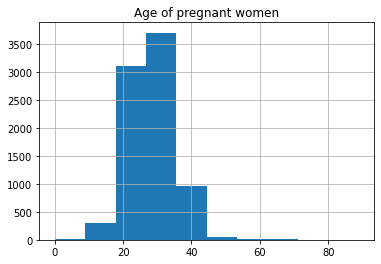

In [40]:
ages=df[df['pregnant']==1].age.unique()
print("Age of pregnant women: ", ages)
plt.title("Age of pregnant women")
df[df['pregnant']==1].age.hist();

* Age of pregnant women is ditrubuted between 18 and 35.

# ML Model To Predict Death

In [41]:
# import helpful libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [42]:
df.columns

Index(['usmer', 'medical_unit', 'patient_type', 'pneumonia', 'age', 'pregnant',
       'diabetes', 'copd', 'asthma', 'inmsupr', 'hipertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'date_parsed', 'death', 'elderly', 'month'],
      dtype='object')

In [43]:
features=["inmsupr","hipertension", "elderly","cardiovascular", "renal_chronic", "other_disease", "copd", "diabetes", "obesity", "tobacco", "age", "pneumonia"]

In [44]:
#Separate target data 
y = df.death.iloc[:-10]
x= df.loc[:,features].iloc[:-10]
new_data= df.loc[:, features].iloc[-10:]
result_nw_data=df['death'].iloc[-10:]
x.head()

,inmsupr,hipertension,elderly,cardiovascular,renal_chronic,other_disease,copd,diabetes,obesity,tobacco,age,pneumonia
0,2,1,1,2,2,2,2,2,2,2,65,1
1,2,1,1,2,1,2,2,2,1,2,72,1
2,2,2,2,2,2,2,2,1,2,2,55,2
3,2,2,2,2,2,2,2,2,2,2,53,2
4,2,1,1,2,2,2,2,1,2,2,68,2


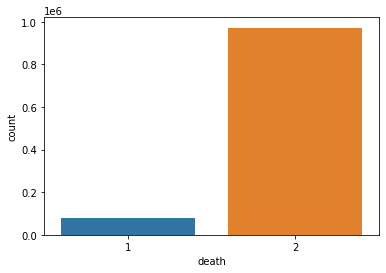

In [45]:
sns.countplot(x=y); # that will make unacurate prediction

In [46]:
#samble size
df.shape

(1048575, 20)

In [47]:
# Resambeling of data
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
x_re,y_re = ros.fit_resample(x,y)

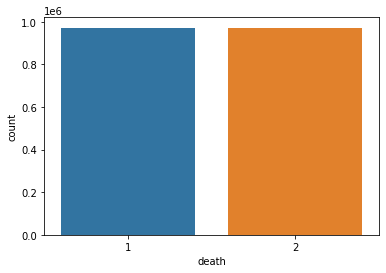

In [48]:
sns.countplot(x=y_re);

In [49]:
#Split data to validation and training
train_x, val_x, train_y, val_y = train_test_split(x_re, y_re, random_state=1) 

In [50]:
#Define dcision tree model
model = DecisionTreeRegressor(random_state=1)
model.fit(train_x, train_y)
prediction = model.predict(val_x)
prediction

array([1.06438069, 1.4092559 , 1.79321033, ..., 1.99439252, 1.48717949,
       1.0725259 ])

In [51]:
#Make dataframe to compare prediction with real data
real_pred={"Real":list(val_y[10:20]),
          "Predict": list(prediction[10:20])}
df_real_pred=pd.DataFrame(real_pred)
df_real_pred

,Real,Predict
0,1,1.090909
1,1,1.107843
2,2,1.829167
3,2,1.800880
4,2,1.907501
5,2,1.978381
6,1,1.085219
7,1,1.034783
8,2,1.976316
9,1,1.111111


In [52]:
#Evaluate model
mae = mean_absolute_error(prediction, val_y)

In [53]:
print("Validation MAE for Desicion Tree Model: {:,f}".format(mae))

Validation MAE for Desicion Tree Model: 0.202859


In [54]:
#test of model by new data
list(model.predict(new_data))

[1.9474587912087913,
 1.9808700718586134,
 2.0,
 1.6652173913043478,
 1.5767716535433072,
 1.9253820033955857,
 1.779436152570481,
 1.7588141025641026,
 1.9756991875763894,
 1.7910427443506671]

* Model predict patient will survive.

In [55]:
# check real values 
result_nw_data

1048565    2
1048566    2
1048567    2
1048568    2
1048569    2
1048570    2
1048571    2
1048572    2
1048573    2
1048574    2
Name: death, dtype: int64

Data said patients survived.

# Conclusions
* Number of deaths was high from may to juli.
* There is a strong correlation between obesity and chronic diseases.
* Elderly patients (>65) tend to hospatilized.
* Incidence of death of COVID is high in elderly.
* Age ditributed between 20 and 60.
* Age of pregnant is distributed between 18 and 35.
* Patients with COPD, CKD, immunosuppression, diabetes, CVS and elderly patient are likely to acquire pneumonia.
* Pneumonia increase incidence of death by COVID the most.
* A little of patients which returned home died.


# Recommendations

### Some patients need more care more than others especially who have chronic diseases and eldery.
### Causion should be taken the most between 5 and 7 months.
### Danger on pregnant is not that high but causion should be taken.
### Death of COVID is due to COVID complication, better to treat quiklyl at the onst of symptoms.

# Limitations:
* some data were non logic, many values were missed.

# Note:
### Discussion is welcome. if you have an amendment or advice, I'd be grateful.